In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [2]:
def plot_confusion_matrix(data, labels, output_filename):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()
    
def starttime():
    return time.time()

def endtime():
    return time.time()

In [3]:
dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23-CIC/Dataset/2-Mean.csv")
dataset["Label"] = dataset["Label"].astype("category").cat.codes
clean_dataset = dataset.drop(columns=["Label"])
label = dataset["Label"]
dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,108820696,14,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,207.333333,186.088868,498.0,2.0,2.179828e+14,5.767284e+14,1.525880e+15,5.965355e+06,0
1,17,64001377,2,2,96.0,96.0,48.0,48.0,48.0,0.0,...,8,1239.000000,0.000000,1239.0,1239.0,7.629400e+14,1.078960e+15,1.525880e+15,6.399890e+07,0
2,17,3737,1,1,48.0,48.0,48.0,48.0,48.0,0.0,...,8,0.000000,0.000000,0.0,0.0,1.525880e+15,0.000000e+00,1.525880e+15,1.525880e+15,0
3,17,26467,1,1,48.0,48.0,48.0,48.0,48.0,0.0,...,8,0.000000,0.000000,0.0,0.0,1.525880e+15,0.000000e+00,1.525880e+15,1.525880e+15,0
4,17,14733,1,1,48.0,48.0,48.0,48.0,48.0,0.0,...,8,0.000000,0.000000,0.0,0.0,1.525880e+15,0.000000e+00,1.525880e+15,1.525880e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553614,6,7179174,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,0.000000,0.000000,0.0,0.0,1.545410e+15,0.000000e+00,1.545410e+15,1.545410e+15,1
553615,6,7219390,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,0.000000,0.000000,0.0,0.0,1.545483e+15,0.000000e+00,1.545483e+15,1.545483e+15,1
553616,6,42726,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.000000,0.000000,0.0,0.0,1.545462e+15,0.000000e+00,1.545462e+15,1.545462e+15,1
553617,6,7226381,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,0.000000,0.000000,0.0,0.0,1.545481e+15,0.000000e+00,1.545481e+15,1.545481e+15,1


In [4]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    clean_dataset, label, test_size=1/7.0, random_state=1
)

In [5]:
start = starttime()
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)
end = starttime()
print(end-start)

28.143513441085815


In [6]:
scores = cross_val_score(estimator=clf, X=clean_dataset, y=label, cv=5, n_jobs=8)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(), scores.std()), end="\n\n" )

mean: 0.888 (std: 0.120)



In [7]:
y_pred = clf.predict(x_test)

In [8]:
# Accucary
acc = accuracy_score(y_test, y_pred)
acc

0.9460986989341122

In [9]:
# Recall
recall = recall_score(y_test, y_pred)
recall

0.9440279245839581

In [10]:
# F1 Score
f1 = f1_score(y_test, y_pred)
f1

0.9474164621134562

In [11]:
# Precision
precision = precision_score(y_test, y_pred)
precision

0.9508294132210944

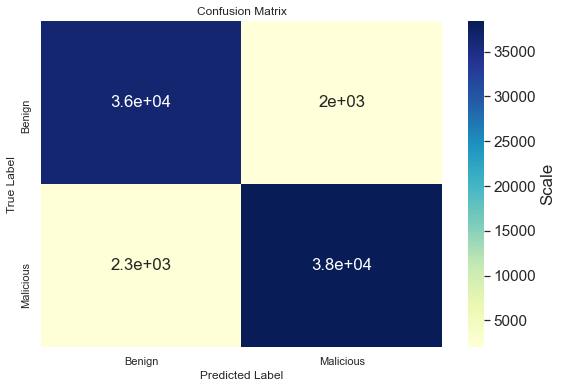

In [12]:
labels = ["Benign", "Malicious"]
conf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf, labels, "confusion_matrix.png")